# Discovering Periodic Frequent patterns in Big Data Using PFPGrowthPlus Algorithm

In this tutorial, we will discuss the first approaches to find Periodic Frequent patterns in big data using PFPGrowth++ algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Periodic Frequent patterns using a single minimum support value 

***

## <a id='basicApproach'>Basic approach: Executing PFPGrowthPlus on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PFPGrowthPlus algorithm

In [1]:
from PAMI.periodicFrequentPattern.basic import PFPGrowthPlus  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'temporal_T10I4D100K.csv'

minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount = 5000
seperator = '\t'       

#### Step 3: Execute the PFPGrowthPlus algorithm

In [3]:
obj = alg.PFPGrowthPlus(iFile=inputFile, minSup=minimumSupportCount,maxPer=maxmunPeriodCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

periodic-frequent patterns were generated successfully using PFPGrowth++ algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='periodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 25462


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 17.72825837135315


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 578142208
Memory (USS): 539918336


# Advanced Tutorial on Implementing PFPGrowthPlus Algorithm

In this tutorial, we will discuss the second approaches to find Periodic Frequent patterns in big data using PFPGrowth++ algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Periodic Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the Periodic Frequent Puttern Growth Plus (PFPGrowthPlus) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the PFPGrowthPlus algorithm and pandas data frame

In [1]:
from PAMI.periodicFrequentPattern.basic import PFPGrowthPlus  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'temporal_T10I4D100K.csv'
seperator = '\t'
maxmunPeriodCount = 5000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxPer','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFPGrowthPlus algorithm

#### Step 3: Execute the PFPGrowthPlus algorithm using a for loop

In [3]:
algorithm = 'PFPGrowthPlus'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.PFPGrowthPlus('temporal_T10I4D100K.csv', minSup=minSupCount,maxPer=maxmunPeriodCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maxmunPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


periodic-frequent patterns were generated successfully using PFPGrowth++ algorithm 
periodic-frequent patterns were generated successfully using PFPGrowth++ algorithm 
periodic-frequent patterns were generated successfully using PFPGrowth++ algorithm 
periodic-frequent patterns were generated successfully using PFPGrowth++ algorithm 
periodic-frequent patterns were generated successfully using PFPGrowth++ algorithm 


In [4]:
print(result)

       algorithm  minSup  maxPer  patterns    runtime     memory
0  PFPGrowthPlus     100    5000     25462  12.942107  579301376
1  PFPGrowthPlus     150    5000     18982  11.716884  577437696
2  PFPGrowthPlus     200    5000     13251  11.130969  574922752
3  PFPGrowthPlus     250    5000      7702  10.318596  570114048
4  PFPGrowthPlus     300    5000      4552  10.184319  566091776


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

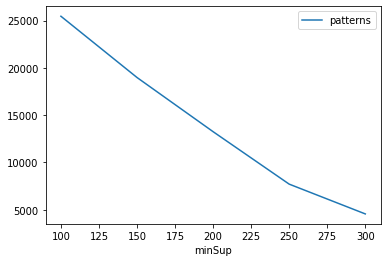

Graph for No Of Patterns is successfully generated!


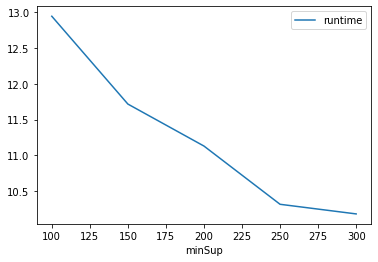

Graph for Runtime taken is successfully generated!


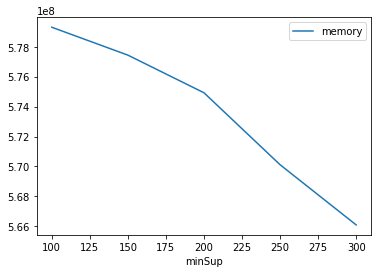

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
